In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [59]:
df = pd.read_json('data/data.json',)

In [3]:
df.head()


,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [6]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [7]:
len(df.columns)

44

In [61]:
fraud_acct = {'fraudster_event','fraudster','fraudster_att'}
df['fraud_flag'] = df.acct_type.apply(lambda x: x in fraud_acct)

In [62]:
df['fraud_flag'].sum()


1293

In [63]:
X = df.drop('fraud_flag', axis=1)
y = df['fraud_flag']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.feature_importances_)

ValueError: could not convert string to float: 'England'

In [39]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fra4ud_flag,fraud_flag
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,1283870102,3,,None,NaN,NaN,None,None,False,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False,False


In [41]:
df.isnull().sum().sort_values(ascending=False).head(20)

has_header         5409
venue_state        1076
venue_name         1076
venue_longitude    1076
venue_latitude     1076
venue_country      1076
sale_duration       155
event_published      99
country              81
org_twitter          59
org_facebook         59
delivery_method      16
event_start           0
fraud_flag            0
fb_published          0
gts                   0
has_analytics         0
description           0
event_end             0
event_created         0
dtype: int64

In [42]:
df.has_header.unique()

array([  1.,   0.,  nan])

In [43]:
df.venue_state.unique()


array(['FL', 'SC', 'CA', None, 'MA', 'KY', 'MD', 'NC', '', 'TX', 'NY',
       'ME', 'MI', 'AZ', 'MN', 'IL', 'British Columbia', 'OH', 'DC', 'IN',
       'AL', 'IA', 'GA', 'London', 'Ontario', 'PA', 'New South Wales',
       'VA', 'Suffolk', 'Bournemouth', 'MASSACHUSETTS', 'Alberta', 'WA',
       'QC', 'Manchester', 'Birmingham', 'WI', 'Leeds', 'NJ', 'NV',
       'England', 'OR', 'CT', 'Ile De France', 'CO', 'ONTARIO',
       'South York', 'Nova Scotia', 'UT', 'Gt Lon', 'NSW', 'KS', 'Surrey',
       'HI', 'TN', 'BC', 'Sheffield', 'Berlin', 'West Mids', 'SK',
       'Scotland', 'QLD', 'AB', 'Newcastle Upon Tyne', 'Derry', 'LA', 'ON',
       'Hertfordshire', 'Auckland', 'Gloucestershire', 'NE', 'OK', 'MO',
       'Haute Normandie', 'VIC', 'Glasgow City', 'Queensland', 'PACA',
       'Warks', 'Sor-Trondelag', 'SA', 'ID', 'NH', 'Cardiff',
       'Greater London', 'NJ 07102-4398', 'AR', 'Edinburgh, City Of',
       'PENNSYLVANIA', 'Quebec', 'AK', 'Cambs', 'New Jersey', 'NB',
       'Midlothi

In [79]:
numerical_feature=df.dtypes[df.dtypes!= 'object'].index
categorical_feature=df.dtypes[df.dtypes== 'object'].index

In [80]:
numerical_feature

Index(['approx_payout_date', 'body_length', 'channels', 'delivery_method',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'name_length', 'num_order', 'num_payouts', 'object_id', 'org_facebook',
       'org_twitter', 'sale_duration', 'sale_duration2', 'show_map',
       'user_age', 'user_created', 'user_type', 'venue_latitude',
       'venue_longitude', 'fraud_flag'],
      dtype='object')

In [81]:
categorical_feature

Index(['acct_type', 'country', 'currency', 'description', 'email_domain',
       'listed', 'name', 'org_desc', 'org_name', 'payee_name', 'payout_type',
       'previous_payouts', 'ticket_types', 'venue_address', 'venue_country',
       'venue_name', 'venue_state'],
      dtype='object')

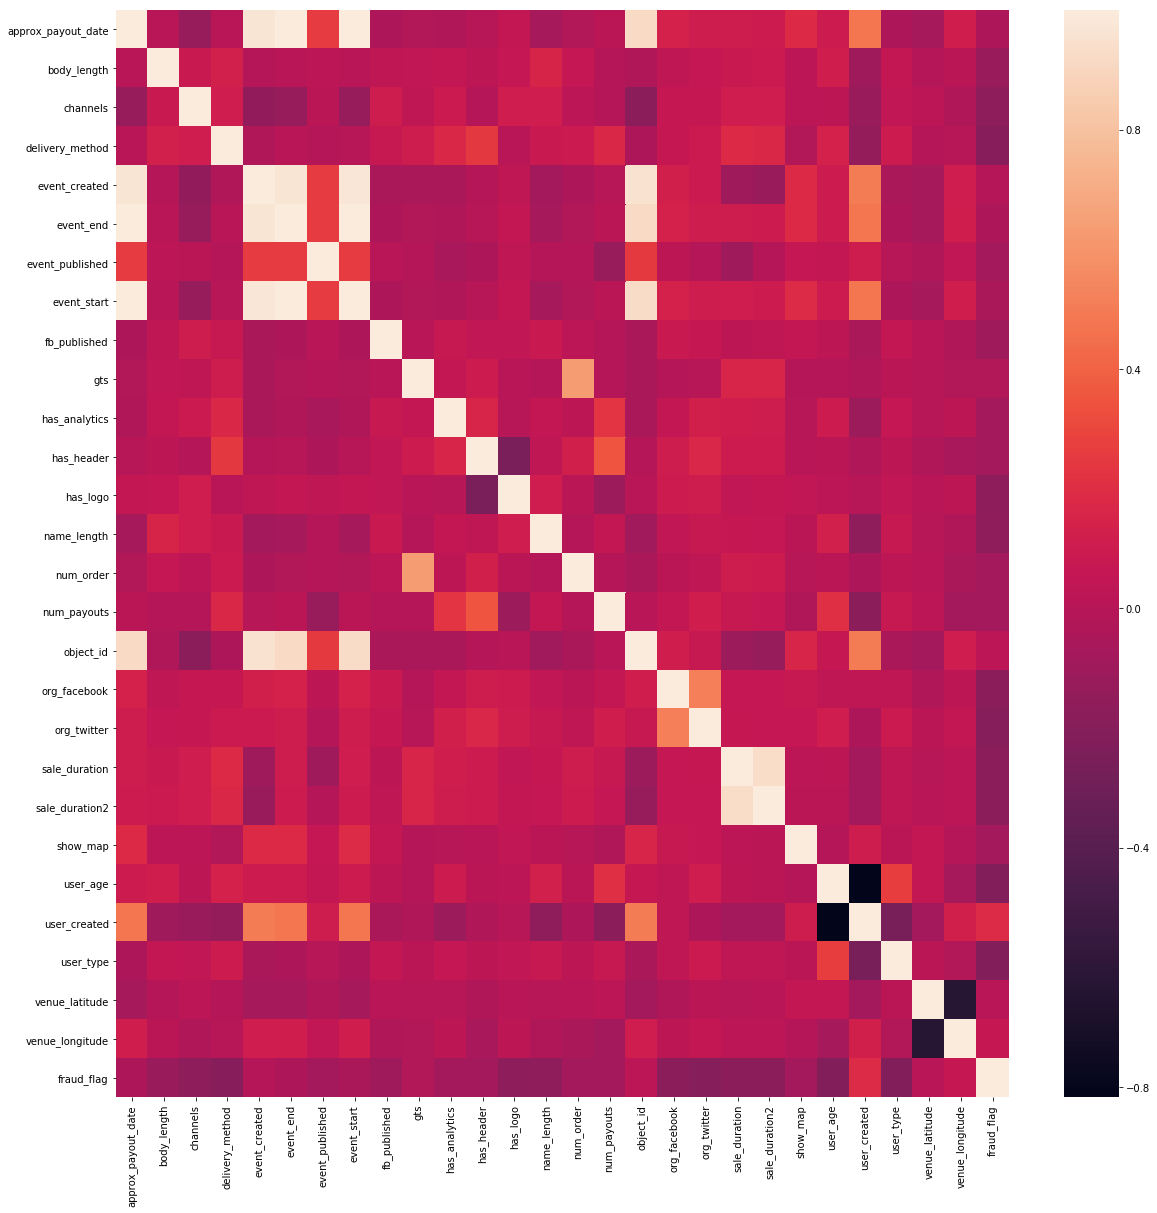

In [73]:
fig, ax = plt.subplots(figsize=(20, 20))
corr=df[numerical_feature].corr()
sns.heatmap(corr)

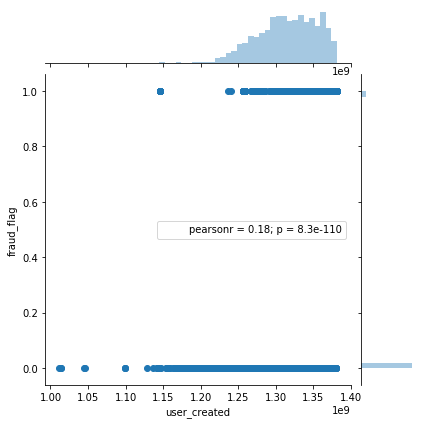

In [75]:
sns.jointplot(x=df['user_created'], y=df['fraud_flag'])

In [88]:
df[categorical_feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 17 columns):
acct_type           14337 non-null object
country             14256 non-null object
currency            14337 non-null object
description         14337 non-null object
email_domain        14337 non-null object
listed              14337 non-null object
name                14337 non-null object
org_desc            14337 non-null object
org_name            14337 non-null object
payee_name          14337 non-null object
payout_type         14337 non-null object
previous_payouts    14337 non-null object
ticket_types        14337 non-null object
venue_address       14337 non-null object
venue_country       13261 non-null object
venue_name          13261 non-null object
venue_state         13261 non-null object
dtypes: object(17)
memory usage: 2.6+ MB


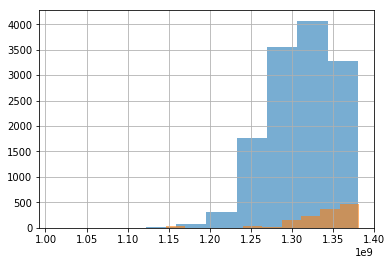

In [94]:
df.groupby('fraud_flag').user_created.hist(alpha=0.6);

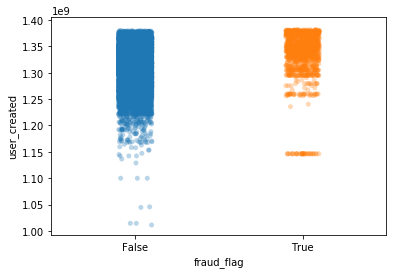

In [95]:
sns.stripplot(x='fraud_flag', y='user_created', data=df, alpha=0.3, jitter=True);

In [100]:
df_drop_na = df.dropna()

In [102]:
sns.pairplot(df_drop_na[numerical_feature], hue='fraud_flag')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [103]:
sns.pairplot(df_drop_na[categorical_feature], hue='fraud_flag')

IndexError: index -1 is out of bounds for axis 0 with size 0

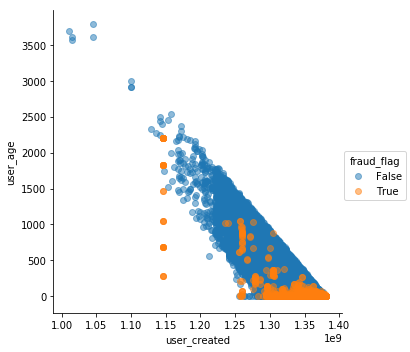

In [104]:
sns.lmplot(x='user_created', y='user_age', hue='fraud_flag', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

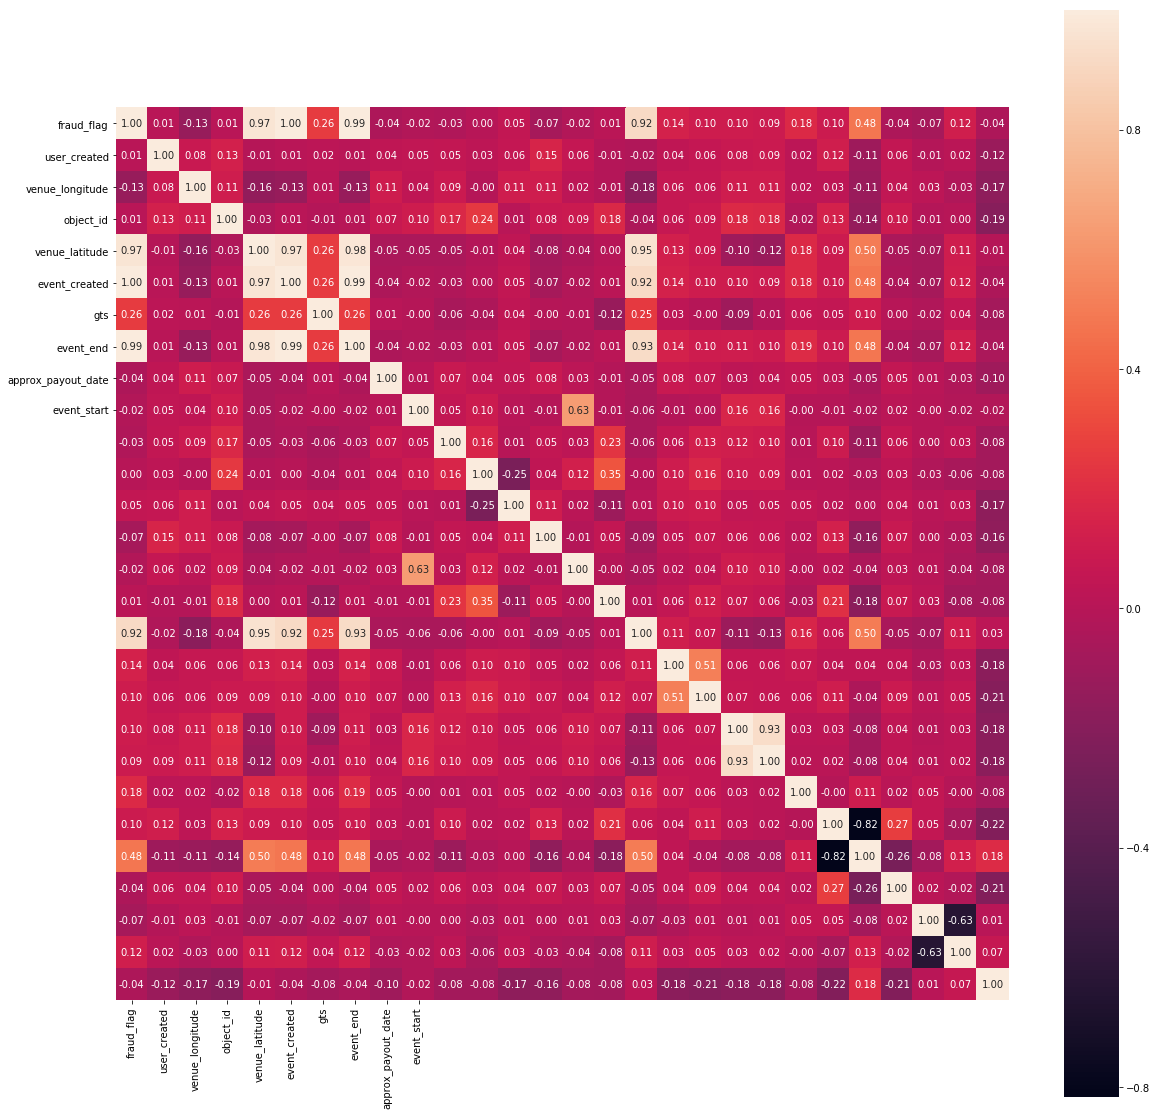

In [120]:
fig, ax = plt.subplots(figsize=(20, 20))

hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [127]:
corr.fraud_flag.sort_values(ascending=False)

fraud_flag            1.000000
user_created          0.184360
venue_longitude       0.066057
object_id             0.026721
venue_latitude        0.010126
event_created        -0.006436
gts                  -0.017875
event_end            -0.042553
approx_payout_date   -0.042553
event_start          -0.044995
show_map             -0.076217
event_published      -0.077322
num_order            -0.078008
has_header           -0.082101
num_payouts          -0.083433
has_analytics        -0.084626
fb_published         -0.099143
body_length          -0.118308
name_length          -0.158447
channels             -0.165358
has_logo             -0.169485
sale_duration        -0.179512
sale_duration2       -0.179550
org_facebook         -0.181792
delivery_method      -0.194046
org_twitter          -0.205692
user_type            -0.213911
user_age             -0.215929
Name: fraud_flag, dtype: float64

In [126]:
df[['description','fraud_flag']].loc[df['fraud_flag']==1]

,description,fraud_flag
0,"<p><a href=""http://s432.photobucket.com/albums...",True
26,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",True
51,"<p><span style=""font-size: x-large;"">Okay ever...",True
54,"<h3><strong><strong><span style=""font-family: ...",True
70,,True
128,"<p><span style=""font-size: medium; color: #ff0...",True
130,<p>TODAY'S LIVE Conference Call is scheduled f...,True
131,<p> ALL PROCEEDS WILL GO TOWARD BETTERING OUR ...,True
140,<p>TODAY'S LIVE Conference Call is scheduled f...,True
144,<p>Join us for two full days of continuing edu...,True


In [129]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.feature_importances_)

ValueError: could not convert string to float: 'England'

In [155]:
dummies = pd.get_dummies(X_train,columns=categorical_features,dummy_na=True,drop_first=True)

In [141]:
categorical_feature1 = ['acct_type', 'country', 'currency', 'email_domain',
       'listed', 'name', 'org_desc', 'org_name', 'payee_name', 'payout_type',
       'previous_payouts', 'ticket_types', 'venue_country',
       'venue_name', 'venue_state']


In [151]:
categorical_features = ['country','currency','acct_type','email_domain','listed']

In [153]:
dummies

,approx_payout_date,body_length,channels,delivery_method,description,event_created,event_end,event_published,event_start,fb_published,...,email_domain_zombcon.com,email_domain_zonefranche.ca,email_domain_zoomarun.com,email_domain_zoomjer.com,email_domain_zuloo.co.uk,email_domain_zumba-perth.com,email_domain_zwia.org,email_domain_nan,listed_y,listed_nan
2698,1345492800,1617,11,0.0,"<p>The Entrepreneur's Club of America, Medina ...",1341256315,1345060800,1.341257e+09,1345055400,0,...,0,0,0,0,0,0,0,0,1,0
6006,1295555400,3268,12,0.0,"<p><font face=""book antiqua,palatino""><span cl...",1287371352,1295123400,1.287372e+09,1295116200,0,...,0,0,0,0,0,0,0,0,1,0
9753,1353628800,0,0,0.0,,1349729322,1353196800,NaN,1353186000,0,...,0,0,0,0,0,0,0,0,1,0
408,1376629200,696,0,0.0,<p>Enjoy the Food and Entertainment from the G...,1369987439,1376197200,1.370924e+09,1376100000,0,...,0,0,0,0,0,0,0,0,1,0
6930,1374903000,1778,0,0.0,"<div style=""color: #000000; font-family: arial...",1371771565,1374471000,1.371772e+09,1374460200,0,...,0,0,0,0,0,0,0,0,1,0
1608,1332905400,3898,4,0.0,"<p class=""p1""><strong style=""font-family: aria...",1327869825,1332473400,1.327871e+09,1332468000,0,...,0,0,0,0,0,0,0,0,1,0
3852,1367028000,6334,5,1.0,"<table border=""0"" cellspacing=""0"" cellpadding=...",1363614228,1366596000,1.363614e+09,1363712400,0,...,0,0,0,0,0,0,0,0,1,0
10792,1358373600,3163,6,1.0,"<p style=""text-align: center;""><span style=""fo...",1355165976,1357941600,1.355170e+09,1357934400,0,...,0,0,0,0,0,0,0,0,1,0
7372,1366239600,12166,11,1.0,"<p style=""margin-top: px; margin-bottom: px;"">...",1364497363,1365807600,1.364497e+09,1365696000,0,...,0,0,0,0,0,0,0,0,1,0
9891,1377819000,3684,6,0.0,"<h3 style=""color: #074077; font-family: 'Open ...",1367245965,1377387000,1.367951e+09,1377376200,0,...,0,0,0,0,0,0,0,0,1,0


In [158]:
df.previous_payouts[1]

[{'address': '1700 North Brown Road',
  'amount': 34389.38,
  'country': 'US',
  'created': '2010-10-01 01:10:09',
  'event': 786869,
  'name': 'RUF',
  'state': 'GA',
  'uid': 5419068,
  'zip_code': '30043'},
 {'address': '1700 North Brown Road',
  'amount': 764.93,
  'country': 'US',
  'created': '2011-02-02 01:12:10',
  'event': 786878,
  'name': 'RUF',
  'state': 'GA',
  'uid': 5419068,
  'zip_code': '30043'},
 {'address': '1700 North Brown Road',
  'amount': 17405.26,
  'country': 'US',
  'created': '2011-03-15 01:30:42',
  'event': 1181203,
  'name': 'RUF',
  'state': 'GA',
  'uid': 5419068,
  'zip_code': '30043'},
 {'address': '1700 North Brown Road',
  'amount': 2224.16,
  'country': 'US',
  'created': '2011-03-15 01:30:42',
  'event': 1293213,
  'name': 'RUF',
  'state': 'GA',
  'uid': 5419068,
  'zip_code': '30043'},
 {'address': '1700 North Brown Road',
  'amount': 5370.58,
  'country': 'US',
  'created': '2011-04-01 01:30:31',
  'event': 1181203,
  'name': 'RUF',
  'state':